In [2]:
#ACA LO HAGO EN UNIDADES NO COMOVILES

In [3]:
%pylab inline
import pynbody

Populating the interactive namespace from numpy and matplotlib


In [4]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
s0=pynbody.load(path+'snapshot_050')

In [5]:
gas0=s0.gas
pos0=gas0['pos']
ne0=gas0['ne']
u0=gas0['u']
rho0=gas0['rho']

In [6]:
xbox=403.8960 
ybox=459.8882
zbox=440.9021 
xc=408.205481 - xbox + 250 
yc=457.777839 - ybox + 250   
zc=441.538681 - zbox + 250

r0=np.sqrt((pos0[:,0]-xc)**2+(pos0[:,1]-yc)**2+(pos0[:,2]-zc)**2)

In [39]:
#selecciono mi void
rv=9
cutv0, = np.where(r0<rv)

In [40]:
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mu0=(1.0-yHe)/(1+yHe+ne0)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
a=s0.properties['a']
te0=(5./3.-1.)*u0*vv*mu0*(mp/kcgs)

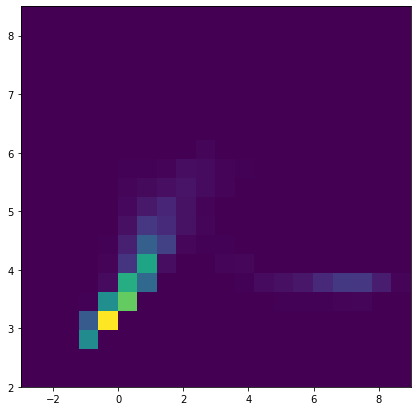

In [41]:
plt.figure(figsize=(7,7))
h=plt.hist2d(np.log10(rho0[cutv0]),np.log10(te0[cutv0]),density='true',bins=20,range=([-3,9],[2,8.5]))

In [25]:
r2=18
r1=12
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10

In [58]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
t=pynbody.load(path+'snapshot_020')
gas=t.gas
pos=gas['pos']
u=gas['u']
ne=gas['ne']
rho=gas['rho']
redshift=1./t.properties['a']-1
a=t.properties['a']
mu=(1.0-yHe)/(1+yHe+ne)
te=(5./3.-1.)*u*vv*mu*(mp/kcgs)
tec=(5./3.-1.)*u*vv*mu*(mp/kcgs)*a**2
r=np.sqrt((pos[:,0]-xc)**2+(pos[:,1]-yc)**2+(pos[:,2]-zc)**2)
cut, = np.where((r<r2) & (r>r1))

In [59]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
t2=pynbody.load(path+'snapshot_040')
gas=t2.gas
pos=gas['pos']
u=gas['u']
ne=gas['ne']
rho2=gas['rho']
redshift=1./t3.properties['a']-1
a=t2.properties['a']
mu=(1.0-yHe)/(1+yHe+ne)
te2=(5./3.-1.)*u*vv*mu*(mp/kcgs)
te2c=(5./3.-1.)*u*vv*mu*(mp/kcgs)*a**2
r=np.sqrt((pos[:,0]-xc)**2+(pos[:,1]-yc)**2+(pos[:,2]-zc)**2)
cut2, = np.where((r<r2) & (r>r1))

In [60]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
t3=pynbody.load(path+'snapshot_050')
gas=t3.gas
pos=gas['pos']
u=gas['u']
ne=gas['ne']
rho3=gas['rho']
redshift=1./t3.properties['a']-1
a=t3.properties['a']
mu=(1.0-yHe)/(1+yHe+ne)
te3=(5./3.-1.)*u*vv*mu*(mp/kcgs)
te3c=(5./3.-1.)*u*vv*mu*(mp/kcgs)*a**2
r=np.sqrt((pos[:,0]-xc)**2+(pos[:,1]-yc)**2+(pos[:,2]-zc)**2)
cut3, = np.where((r<r2) & (r>r1))

In [ ]:
plt.figure(figsize=(7,15))

plt.subplot(121)
plt.plot(np.log10(rho3[cut3]),np.log10(te3[cut3]),ls='none',marker='.',markersize=.05,color='green')
plt.plot(np.log10(rho2[cut2]),np.log10(te2[cut2]),ls='none',marker='.',markersize=.05,alpha=1,color='blue')
plt.plot(np.log10(rho[cut]),np.log10(te[cut]),ls='none',marker='.',markersize=.05,alpha=1,color='red')

plt.subplot(122)
plt.plot(np.log10(rho3[cut3]),np.log10(te3c[cut3]),ls='none',marker='.',markersize=.05,color='green')
plt.plot(np.log10(rho2[cut2]),np.log10(te2c[cut2]),ls='none',marker='.',markersize=.05,alpha=1,color='blue')
plt.plot(np.log10(rho[cut]),np.log10(tec[cut]),ls='none',marker='.',markersize=.05,alpha=1,color='red')